In [1]:
import os
import matplotlib.pyplot as plt

from qcodes.dataset.plotting import plot_by_id

import nanotune as nt
from nanotune.classification.classifier import Classifier

nt_path = os.path.dirname(os.path.dirname(os.path.abspath(nt.__file__)))

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/jana/.qcodes/logs/command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : /Users/jana/.qcodes/logs/210527-40035-qcodes.log


Instantiate classifier, which also load the training data

In [2]:
clf = Classifier(
    ['pinchoff.npy'],
    'pinchoff',
    data_types=["signal"],
    classifier="SVC",
    folder_path=os.path.join(nt_path, 'data', 'training_data'),
)

/Users/jana/Documents/code/nanotune/nanotune/data/training_data/pinchoff.npy
n_samples: 3699


Train the classifier

In [3]:
clf.train()

Choose data which should be classified

In [4]:
db_folder = os.path.join(nt_path, 'data', 'tuning')
db_name = "device_characterization.db"
run_ids = [1203, 347]

nt.set_database(db_name, db_folder)

good quality


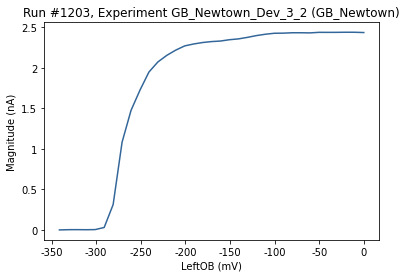

poor quality


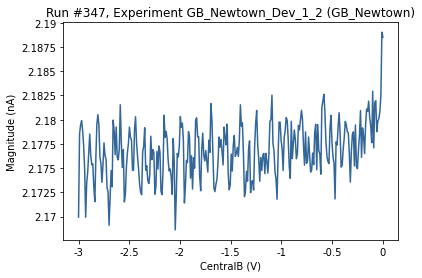

In [5]:
for run_id in run_ids:
    quality = clf.predict(
        run_id,
        db_name,
        db_folder,
    )
    if bool(quality[0]):
        print('good quality')
    else:
        print('poor quality')
        
    plot_by_id(run_id)
    plt.show()